In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import pandas_datareader.data as web
import datetime

In [3]:
start = datetime.datetime(2020,5,1)
end = datetime.datetime(2021,5,1)

In [4]:
apple = web.DataReader('AAPL', 'yahoo', start, end)
cisco = web.DataReader('CSCO', 'yahoo', start, end)
ibm = web.DataReader('IBM', 'yahoo', start, end)
amazon = web.DataReader('AMZN', 'yahoo', start, end)

In [5]:
stocks = pd.concat([apple['Close'], cisco['Close'], ibm['Close'], amazon['Close']], axis = 1)
stocks.columns = ['APPLE', 'CISCO', 'IBM', 'AMAZON']

In [6]:
stocks

,APPLE,CISCO,IBM,AMAZON
Date,,,,
2020-05-01,72.267502,40.919998,121.870003,2286.040039
2020-05-04,73.290001,41.349998,121.680000,2315.989990
2020-05-05,74.389999,41.459999,122.580002,2317.800049
2020-05-06,75.157501,41.150002,123.169998,2351.260010
2020-05-07,75.934998,41.369999,121.230003,2367.610107
...,...,...,...,...
2021-04-26,134.720001,51.639999,141.570007,3409.000000
2021-04-27,134.389999,51.369999,142.009995,3417.429932
2021-04-28,133.580002,51.110001,143.000000,3458.500000


In [7]:
stocks.pct_change(1).mean()

APPLE     0.002628
CISCO     0.001011
IBM       0.000768
AMAZON    0.001852
dtype: float64

In [8]:
stocks.pct_change(1).corr()

,APPLE,CISCO,IBM,AMAZON
APPLE,1.000000,0.326440,0.139329,0.692667
CISCO,0.326440,1.000000,0.512666,0.252156
IBM,0.139329,0.512666,1.000000,0.061743
AMAZON,0.692667,0.252156,0.061743,1.000000


In [9]:
stocks.pct_change(1).head()

,APPLE,CISCO,IBM,AMAZON
Date,,,,
2020-05-01,NaN,NaN,NaN,NaN
2020-05-04,0.014149,0.010508,-0.001559,0.013101
2020-05-05,0.015009,0.002660,0.007396,0.000782
2020-05-06,0.010317,-0.007477,0.004813,0.014436
2020-05-07,0.010345,0.005346,-0.015751,0.006954


In [10]:
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,APPLE,CISCO,IBM,AMAZON
Date,,,,
2020-05-01,NaN,NaN,NaN,NaN
2020-05-04,0.014050,0.010453,-0.001560,0.013016
2020-05-05,0.014897,0.002657,0.007369,0.000781
2020-05-06,0.010264,-0.007505,0.004802,0.014333
2020-05-07,0.010292,0.005332,-0.015876,0.006930


In [11]:
# Daily returns, do it for 1 month, 4 months and 12 months

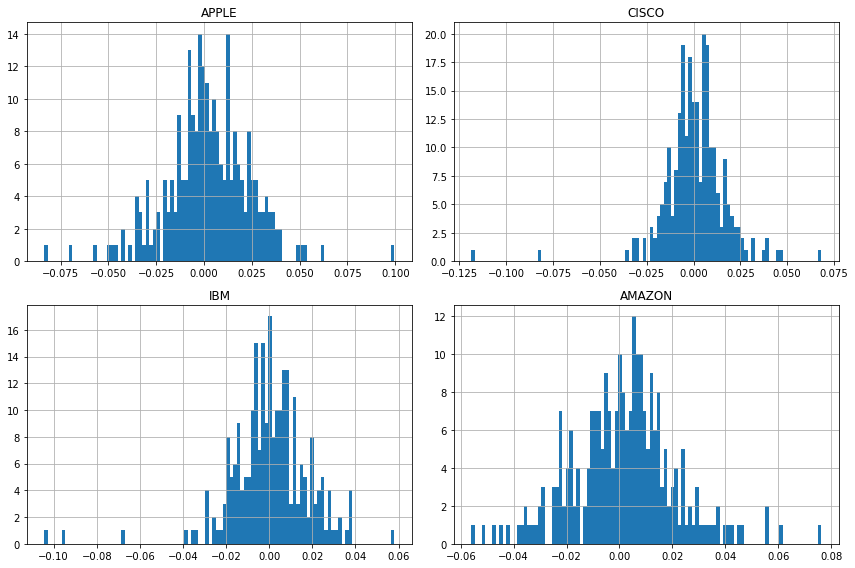

In [12]:
log_ret.hist(bins = 100, figsize = (12,8))
plt.tight_layout()

In [13]:
log_ret.cov() * 252

,APPLE,CISCO,IBM,AMAZON
APPLE,0.121906,0.030454,0.014274,0.075768
CISCO,0.030454,0.071405,0.039247,0.020982
IBM,0.014274,0.039247,0.082517,0.005818
AMAZON,0.075768,0.020982,0.005818,0.096561


In [14]:
np.random.seed(101)

print(stocks.columns)

weights = np.array(np.random.random(4))

print('Random Weights:')
print(weights)

print('Normalized')
weights = weights / np.sum(weights)
print(weights)

# Expected Return
print('Expected Portfolio Return')
exp_ret = np.sum( (log_ret.mean() * weights) * 252)
print(exp_ret)

# Expected Volatility
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot( log_ret.cov() * 252, weights)))
print(exp_vol)

# Sharpe Ratio
print('Sharpe Ratio')
SR = exp_ret / exp_vol
print(SR)

Index(['APPLE', 'CISCO', 'IBM', 'AMAZON'], dtype='object')
Random Weights:
[0.51639863 0.57066759 0.02847423 0.17152166]
Normalized
[0.40122278 0.44338777 0.02212343 0.13326603]
Expected Portfolio Return
0.39737419688796355
Expected Volatility
0.24060841494621518
Sharpe Ratio
1.6515390659831715


In [15]:
# Sharpe Ratio Graph ***

In [16]:
np.random.seed(101)

num_ports = 5000
all_weights = np.zeros((num_ports, len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Weights
    weights = np.array(np.random.random(4))
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind, :] = weights

    # Expected Return
    ret_arr[ind] = np.sum( (log_ret.mean() * weights) * 252)

    # Expected Volatility
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot( log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind] / vol_arr[ind]

In [17]:
sharpe_arr.max(), sharpe_arr.argmax()

(1.7618431179430216, 809)

In [18]:
all_weights[sharpe_arr.argmax(), :]

array([0.58552316, 0.10435794, 0.12899422, 0.18112467])

In [19]:
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]

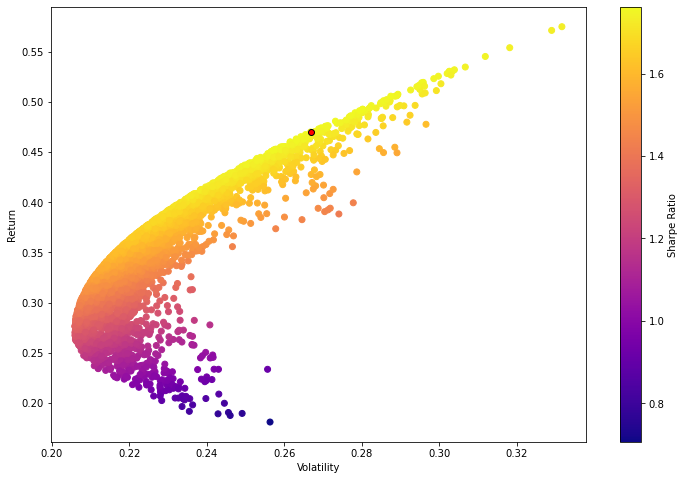

In [20]:
plt.figure(figsize = (12,8))
plt.scatter(vol_arr, ret_arr, c = sharpe_arr, cmap = 'plasma')
plt.colorbar(label = 'Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.scatter(max_sr_vol, max_sr_ret, c = 'red', edgecolors = 'black')

In [21]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    sr = ret / vol
    
    return np.array([ret, vol, sr])

In [22]:
from scipy.optimize import minimize

In [23]:
def neg_sharpe(weights):
    return get_ret_vol_sr(weights)[2] * -1

In [24]:
def check_sum(weights):
    return np.sum(weights) - 1

In [25]:
constraints = [{'type': 'eq', 'fun': check_sum}]

In [26]:
bounds = ((0,1),(0,1),(0,1),(0,1))

In [27]:
init_guess = [0.25, 0.25, 0.25, 0.25]

In [28]:
optimized_results = minimize(neg_sharpe, init_guess, method = 'SLSQP', bounds = bounds, constraints = constraints)

In [29]:
optimized_results

     fun: -1.763208201330475
     jac: array([-4.68790531e-05,  2.24173069e-04, -4.56273556e-05,  9.54270363e-05])
 message: 'Optimization terminated successfully'
    nfev: 35
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([0.63779128, 0.09649591, 0.12108536, 0.14462744])

In [30]:
# Using OR
print(optimized_results.x[0], optimized_results.x[1], optimized_results.x[2], optimized_results.x[3])
print('\n')

# Trials
print(all_weights[sharpe_arr.argmax(), :])

0.637791283592799 0.096495914542189 0.12108536041774742 0.1446274414472647


[0.58552316 0.10435794 0.12899422 0.18112467]


In [31]:
get_ret_vol_sr(optimized_results.x)

array([0.48326331, 0.27408182, 1.7632082 ])

In [32]:
optimized_results.x.sum()

1.0

In [40]:
ret_arr.max(), ret_arr.min()

(0.5749587721059569, 0.1811058170287289)

In [42]:
frontier_y = np.linspace(ret_arr.min(), ret_arr.max(), 100)

In [43]:
def min_vol(weights):
    return get_ret_vol_sr(weights)[1]

In [47]:
frontier_vol = []

for possible_return in frontier_y:
    cons = ({'type': 'eq', 'fun': check_sum}, {'type': 'eq', 'fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(min_vol, init_guess, method = 'SLSQP', bounds = bounds, constraints = constraints)
    
    frontier_vol.append(result['fun'])


In [ ]:
# ------------------------------------------------------------------------------------------------------------------------

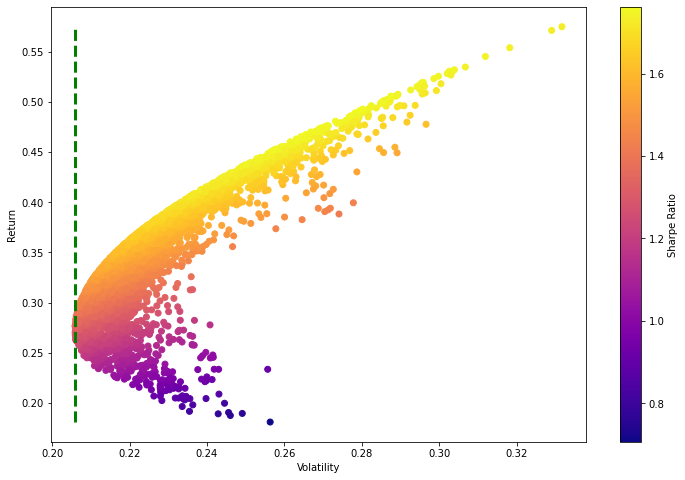

In [56]:
plt.figure(figsize = (12,8))
plt.scatter(vol_arr, ret_arr, c = sharpe_arr, cmap = 'plasma')
plt.colorbar(label = 'Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.plot(frontier_vol, frontier_y, 'g--', linewidth = 3)

In [ ]:
"""
EWMA, EMA, TEMA, 
MACD
Stochastic Oscillator
RSI
Volume

"""